#**Project 2 - Statistical Plot and Distribution Analysis**

# Student Performance Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Statistical Data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# Here there are no null values present in the Data
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [8]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Text(0.5, 1.0, 'Gender Distribution')

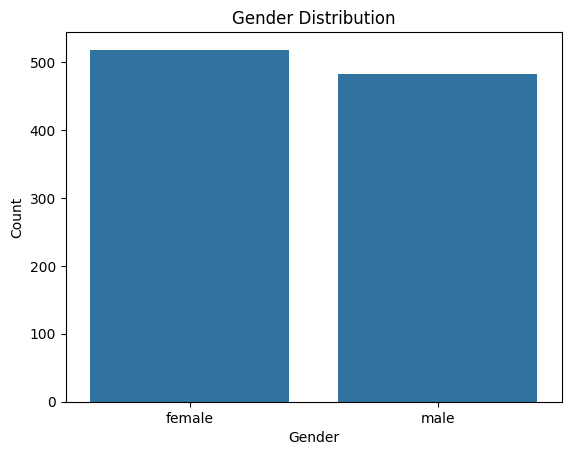

In [10]:
# Univeriate Annalysis
# Count plot
sns.countplot(x = 'gender', data = df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

# From the above countplot ⬆ : The no. of females are more than the no. of males

Text(0.5, 1.0, 'Race/Ethnicity Distribution')

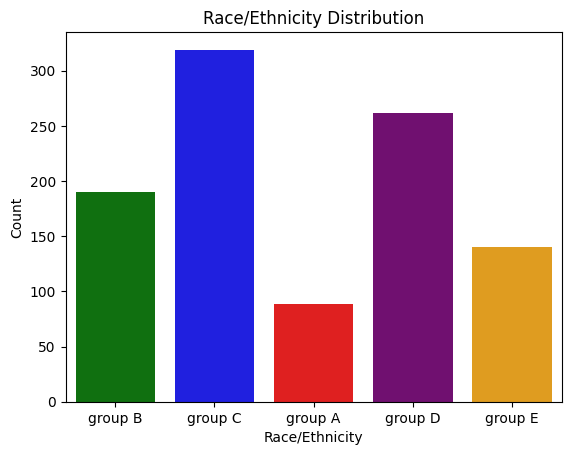

In [19]:
# Univariate Analysis
# Count Plot
sns.countplot(x = 'race/ethnicity', data = df, hue='race/ethnicity', palette = {'group B': 'green', 'group A': 'red', 'group C': 'blue', 'group D': 'purple', 'group E': 'orange'}, legend=False)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.title('Race/Ethnicity Distribution')

# From the above countplot analysis ⬆ - group A has the lowest and group C has the highest count respectively

<Axes: xlabel='math score', ylabel='Count'>

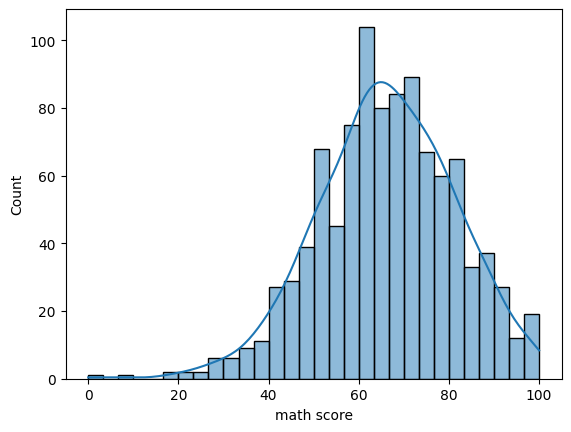

In [21]:
sns.histplot(x = 'math score', data = df, kde = True, bins = 30)

# From the above histplot ⬆ : The graph is right skewed. More number of people have maths score in  the range of 40 to 100

<Axes: xlabel='test preparation course', ylabel='math score'>

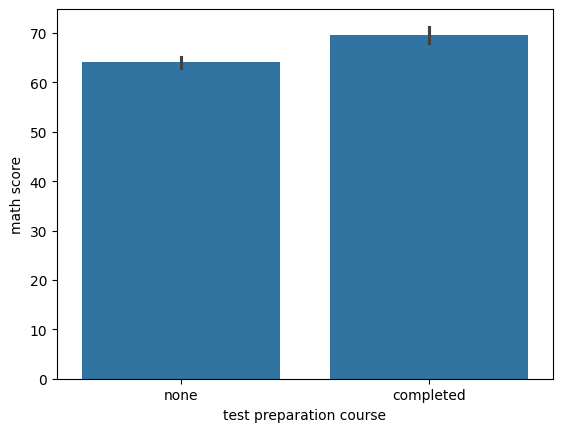

In [32]:
sns.barplot(x = 'test preparation course', y = 'math score', data = df)

<Axes: xlabel='test preparation course', ylabel='writing score'>

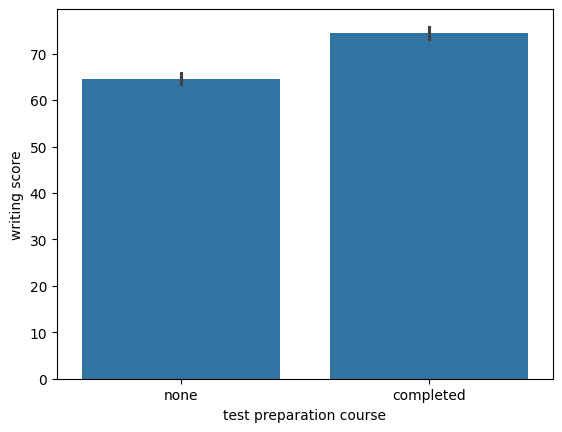

In [33]:
sns.barplot(x = 'test preparation course', y = 'writing score', data = df)

<Axes: xlabel='test preparation course', ylabel='reading score'>

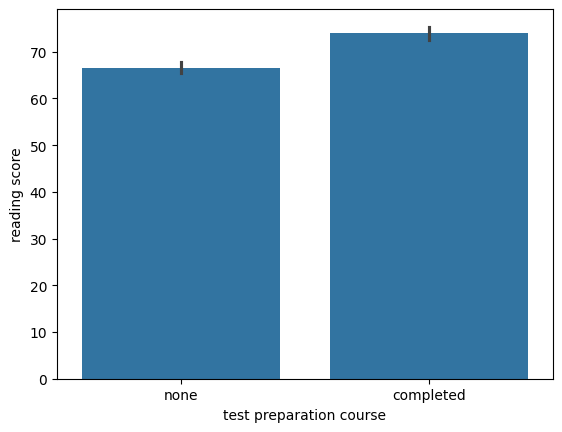

In [34]:
sns.barplot(x = 'test preparation course', y = 'reading score', data = df)

# From the barplot analysis ⬆ : It can be seen that, the students who have completed test preparation course have better marks in maths, reading and writing

In [35]:
# Make a new column
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['total score']

,total score
0,218
1,247
2,278
3,148
4,229
...,...
995,282
996,172
997,195
998,223


<Axes: xlabel='total score', ylabel='race/ethnicity'>

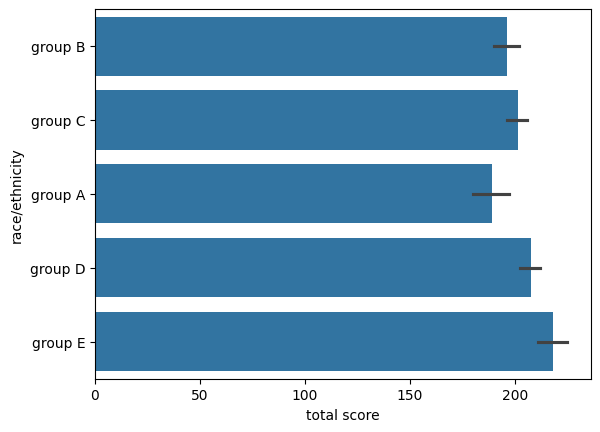

In [43]:
sns.barplot(y = 'race/ethnicity', x = 'total score', data = df)

# From the above bar plot , group E has scored the highest test score

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

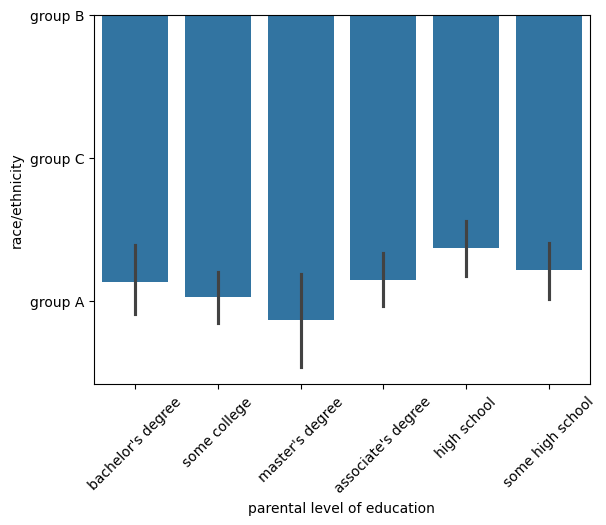

In [47]:
sns.barplot(x = 'parental level of education', y = 'race/ethnicity', data = df)
plt.xticks(rotation = 45)

# Group A having the lowest test score - one possible reason could be their parental level of education.

In [50]:
# One Hot Encoding
pd.get_dummies(df, columns = ['gender', 'race/ethnicity', 'parental level of education'])

,lunch,test preparation course,math score,reading score,writing score,total score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,standard,none,72,72,74,218,True,False,False,True,False,False,False,False,True,False,False,False,False
1,standard,completed,69,90,88,247,True,False,False,False,True,False,False,False,False,False,False,True,False
2,standard,none,90,95,93,278,True,False,False,True,False,False,False,False,False,False,True,False,False
3,free/reduced,none,47,57,44,148,False,True,True,False,False,False,False,True,False,False,False,False,False
4,standard,none,76,78,75,229,False,True,False,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,standard,completed,88,99,95,282,True,False,False,False,False,False,True,False,False,False,True,False,False
996,free/reduced,none,62,55,55,172,False,True,False,False,True,False,False,False,False,True,False,False,False
997,free/reduced,completed,59,71,65,195,True,False,False,False,True,False,False,False,False,True,False,False,False
998,standard,completed,68,78,77,223,True,False,False,False,False,True,False,False,False,False,False,True,False


In [51]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total score'],
      dtype='object')

<Axes: >

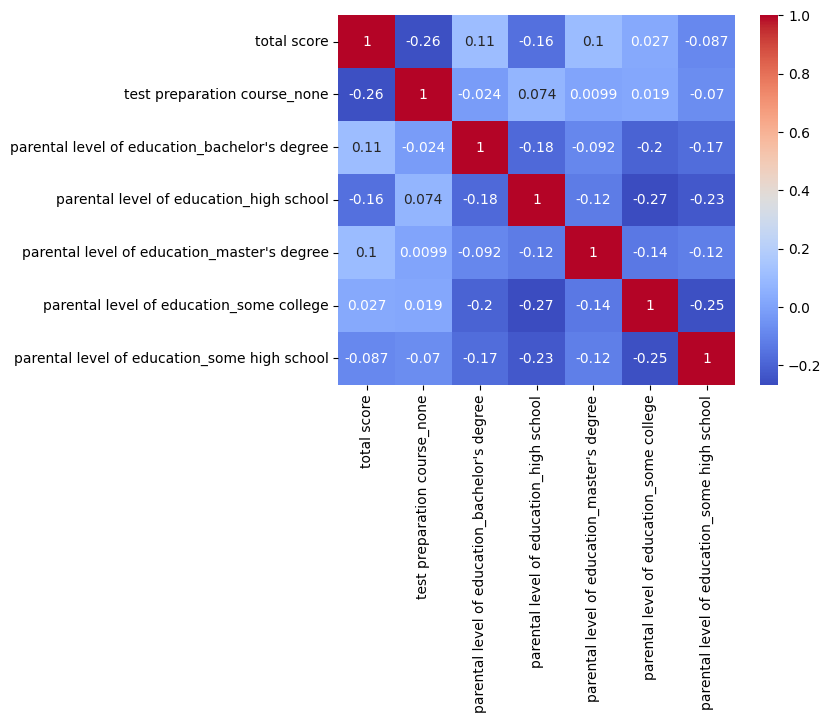

In [55]:
# Select the columns for correlation
selected_cols = df[['total score', 'test preparation course', 'parental level of education']]

# Apply one-hot encoding to the categorical columns
encoded_cols = pd.get_dummies(selected_cols, columns=['test preparation course', 'parental level of education'], drop_first=True)

# Calculate the correlation matrix
corr = encoded_cols.corr()

# Create the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')